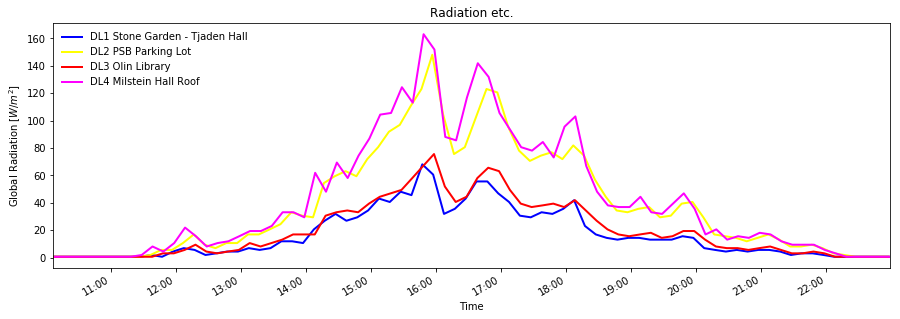

In [105]:
from hoboreader import HoboReader
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path

basePathPatrick = Path("C:/Users/Patrick Kastner/Google Drive/Patrick/OutdoorComfort-Biking/Measurements/Remy/_Stations")
basePathESL = Path("C:/Users/pkastner/Google Drive/Patrick/OutdoorComfort-Biking/Measurements/Remy/_Stations/")
basePathRemy = Path("C:/Users/remym/Dropbox/Cornell 2019-2020/ESL Independent Study/_Stations")
      
    
#DL1	Stone Garden - Tjaden Hall
#DL2	PSB Parking Lot
#DL3	Olin Library
#DL4	Milstein Hall Roof   
  
    
S1=HoboReader(basePathPatrick / "20191101_11-04_DL1.csv") 
S2=HoboReader(basePathPatrick / "20191101-10-50_DL2.csv")
S3=HoboReader(basePathPatrick / "20191115-11-08_DL3.csv")
S4=HoboReader(basePathPatrick / "20191101-12-58_DL4.csv")


df1=S1.get_dataframe()
df2=S2.get_dataframe()
df3=S3.get_dataframe()
df4=S4.get_dataframe()

# Select time

start_time = '2019-10-17 06:00:00-04:00'
end_time = '2019-10-17 19:00:00-04:00'

df1_ = df1.loc[start_time:end_time]
df2_ = df2.loc[start_time:end_time]
df3_ = df3.loc[start_time:end_time]
df4_ = df4.loc[start_time:end_time]

#df1.index

# Print Headers
#print(df1.columns.values)


# Resize figure
custom_figsize=(15,5)

# Change lineweights
lineweights = 2

# Plot two dataframes into one plot
ax = df1_.plot(y=['Solar Radiation'],lw = lineweights, figsize=custom_figsize,color='blue')
df3_.plot(     y=['Solar Radiation'],lw = lineweights, figsize=custom_figsize,color='yellow',ax=ax)
df2_.plot(     y=['Solar Radiation'],lw = lineweights, figsize=custom_figsize,color='red',ax=ax)
df4_.plot(     y=['Solar Radiation'],lw = lineweights, figsize=custom_figsize,color='magenta',ax=ax)

# Subset Time Series By Dates Python Using Pandas
#https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/subset-time-series-data-python/


# Legend
ax.legend([
"DL1 Stone Garden - Tjaden Hall", 
"DL2 PSB Parking Lot",
"DL3 Olin Library",
"DL4 Milstein Hall Roof "  
],loc='upper left', frameon=False)


# Fix xticks

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every minute
hours = mdates.HourLocator()  # every minute
minutes = mdates.MinuteLocator()  # every minute

days_fmt = mdates.DateFormatter('%d')
hours_fmt = mdates.DateFormatter('%H:00')

# format the ticks
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(hours_fmt)
ax.xaxis.set_minor_locator(hours)

#Labels
plt.ylabel('Global Radiation $[W/m^2]$')
plt.xlabel("Time")
     
# Title
ax.set_title('Radiation etc.')

# Save PDF
plt.savefig('Global_Radiation.pdf')

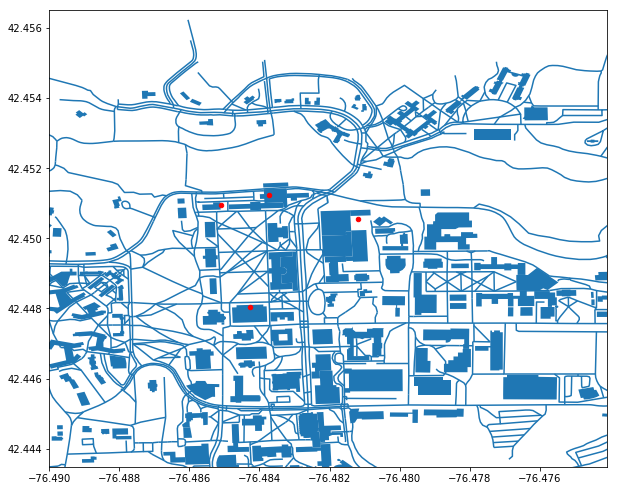

In [167]:
# conda install -c https://conda.anaconda.org/ioos geopandas
# conda install -c conda-forge shapely
# conda install -c conda-forge descartes

import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

#final_crs = {'init': 'epsg:28992'}

buildings = gpd.read_file('Ithaca/map/buildings-polygon.shp')#.to_crs(final_crs)
roads = gpd.read_file('Ithaca/map/roads-line.shp')#.to_crs(final_crs)
fig,ax = plt.subplots(figsize= (10,10))
buildings.plot(ax=ax)
roads.plot(ax=ax)

minx, miny, maxx, maxy = -76.4900, 42.443484, -76.474089, 42.4565
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

DL1= Point((-76.485089,42.450960))
DL2= Point((-76.481194,42.450536))
DL3= Point((-76.484268,42.448039))
DL4= Point((-76.483743,42.451245))

gdf_stations = gpd.GeoSeries([DL1,DL2,DL3,DL4])
gdf_stations.plot(ax=ax, markersize= 20, color= "red", marker = "o")

# Save PDF
plt.savefig('Map.pdf')